In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0].shape

(28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

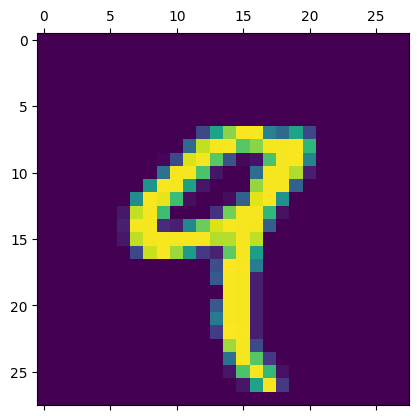

In [9]:
plt.matshow(X_train[4])

In [10]:
y_train[4]

9

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
# to improve result we scale x(you can do it without scaling too)
X_train = X_train/255
X_test = X_test/255

In [13]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_train_flattened.shape

(60000, 784)

In [14]:
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [15]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4747 - accuracy: 0.8748
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3047 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2841 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2729 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2667 - accuracy: 0.9257


In [17]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2651 - accuracy: 0.9259


[0.26512593030929565, 0.9258999824523926]

In [18]:
y = model.predict(X_test_flattened)

313/313 [==============================] - 0s 999us/step


In [19]:
y[7]

array([2.71953149e-06, 1.17922425e-01, 8.41959566e-03, 4.45664190e-02,
       2.55377263e-01, 2.99316317e-01, 1.22337881e-03, 2.32817102e-02,
       1.23102009e-01, 9.74010468e-01], dtype=float32)

In [20]:
np.argmax(y[7])

9

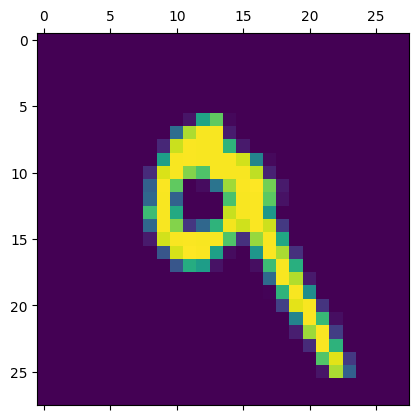

In [21]:
plt.matshow(X_test[7])

In [22]:
y_label = [np.argmax(i) for i in y]
y_label[:5]

[7, 2, 1, 0, 4]

In [23]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    1,    0,    5,    7,    4,    1,    0],
       [   0, 1112,    4,    1,    0,    2,    4,    2,   10,    0],
       [   3,    8,  933,   13,    7,    5,   13,   10,   35,    5],
       [   3,    0,   20,  914,    0,   31,    2,   12,   20,    8],
       [   1,    1,    4,    1,  917,    0,    9,    4,    9,   36],
       [   7,    2,    3,   25,    7,  798,   12,    4,   28,    6],
       [   9,    3,    7,    1,    7,   18,  909,    2,    2,    0],
       [   1,    5,   27,    5,    8,    0,    0,  942,    2,   38],
       [   7,    9,    8,   20,    9,   39,    8,   10,  857,    7],
       [  11,    7,    1,   10,   25,    9,    0,   24,    5,  917]])>

Text(95.72222222222221, 0.5, 'Truth')

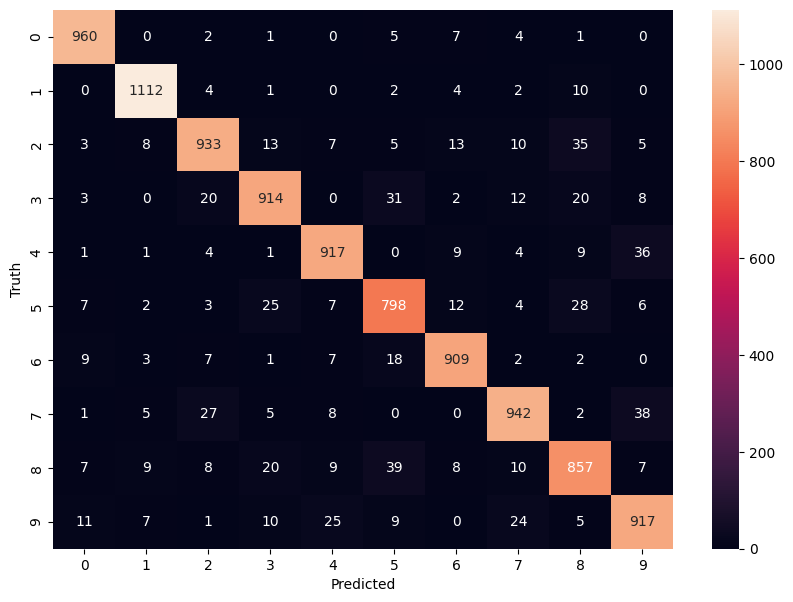

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
# adding hidden layer to improve result

model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2696 - accuracy: 0.9237
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1259 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0892 - accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0676 - accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0525 - accuracy: 0.9832


In [29]:
y_label = [np.argmax(i) for i in y]


313/313 [==============================] - 1s 2ms/step - loss: 0.0739 - accuracy: 0.9766


[0.07394766062498093, 0.9765999913215637]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

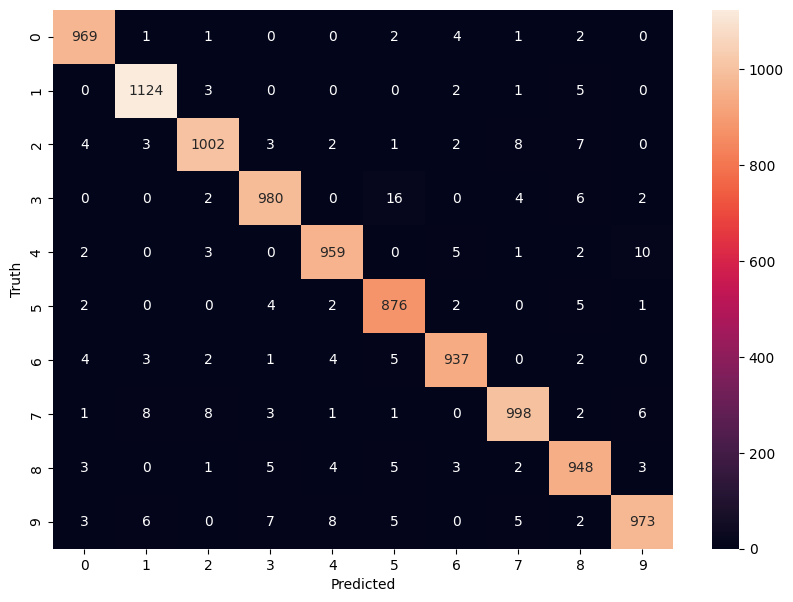

In [33]:
y = model.predict(X_test_flattened)
y_label = [np.argmax(i) for i in y]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_label)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [34]:
# if you don't want to create flattened array by yourself 

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2715 - accuracy: 0.9222
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1252 - accuracy: 0.9629
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0875 - accuracy: 0.9735
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0668 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0517 - accuracy: 0.9844
